In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pandas_datareader.data as pdr
import yfinance as yf
from datetime import datetime

In [2]:
yf.pdr_override()
y_symbols=['AApl']
from datetime import datetime
startdate=datetime(2010,1,1)
endate=datetime(2023,11,29)
data=pdr.get_data_yahoo(y_symbols,start=startdate,end=endate)
data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [28]:
data.tail()

,index,Open,High,Low,Close,Volume
3495,3495,191.410004,191.520004,189.740005,190.639999,38134500
3496,3496,191.490005,192.929993,190.830002,191.309998,39617700
3497,3497,190.869995,190.899994,189.250000,189.970001,24048300
3498,3498,189.919998,190.669998,188.899994,189.789993,40552600
3499,3499,189.779999,191.080002,189.399994,190.399994,38415400


In [25]:
data=data.reset_index()
data

,level_0,index,Open,High,Low,Close,Volume
0,0,0,7.622500,7.660714,7.585000,7.643214,493729600
1,1,1,7.664286,7.699643,7.616071,7.656429,601904800
2,2,2,7.656429,7.686786,7.526786,7.534643,552160000
3,3,3,7.562500,7.571429,7.466071,7.520714,477131200
4,4,4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...,...,...
3495,3495,3495,191.410004,191.520004,189.740005,190.639999,38134500
3496,3496,3496,191.490005,192.929993,190.830002,191.309998,39617700
3497,3497,3497,190.869995,190.899994,189.250000,189.970001,24048300
3498,3498,3498,189.919998,190.669998,188.899994,189.789993,40552600


In [ ]:
data=data.drop(['Date','Adj Close'])

In [29]:
data

,index,Open,High,Low,Close,Volume
0,0,7.622500,7.660714,7.585000,7.643214,493729600
1,1,7.664286,7.699643,7.616071,7.656429,601904800
2,2,7.656429,7.686786,7.526786,7.534643,552160000
3,3,7.562500,7.571429,7.466071,7.520714,477131200
4,4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...,...
3495,3495,191.410004,191.520004,189.740005,190.639999,38134500
3496,3496,191.490005,192.929993,190.830002,191.309998,39617700
3497,3497,190.869995,190.899994,189.250000,189.970001,24048300
3498,3498,189.919998,190.669998,188.899994,189.789993,40552600


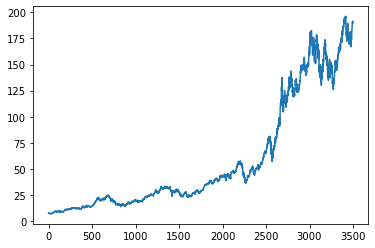

In [30]:
plt.plot(data.Open)

In [31]:
m100=data.Open.rolling(100).mean()
m100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3495    181.510801
3496    181.487901
3497    181.480901
3498    181.481701
3499    181.465401
Name: Open, Length: 3500, dtype: float64

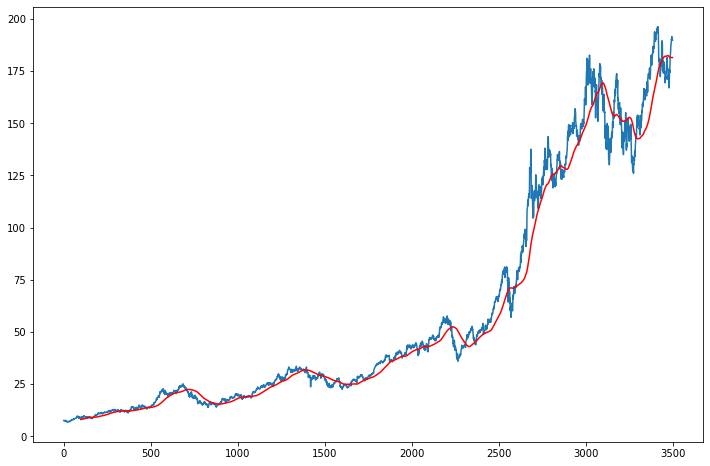

In [32]:
plt.figure(figsize=(12,8))
plt.plot(data.Open)
plt.plot(m100,'r')

In [33]:
m200=data.Open.rolling(200).mean()
m200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3495    173.705901
3496    173.910151
3497    174.095101
3498    174.275801
3499    174.477401
Name: Open, Length: 3500, dtype: float64

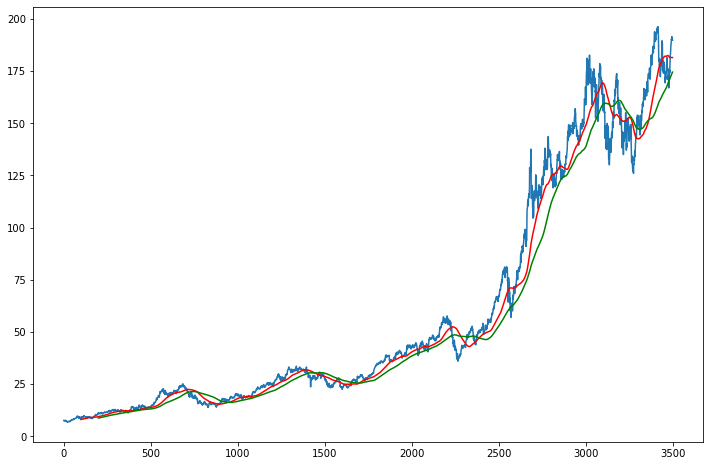

In [11]:
plt.figure(figsize=(12,8))
plt.plot(data.Open)
plt.plot(m100,'r')
plt.plot(m200,'g')

In [34]:
data.shape

(3500, 6)

In [35]:
#splitting data into Training and Testing
data_train=pd.DataFrame(data['Open'][0:int(len(data)*0.70)])
data_test=pd.DataFrame(data['Open'][int(len(data)*0.70):int(len(data))])
print(data_train.shape)
print(data_test.shape)

(2450, 1)
(1050, 1)


In [36]:
data_train.head()

,Open
0,7.622500
1,7.664286
2,7.656429
3,7.562500
4,7.510714


In [37]:
data_test.head()

,Open
2450,55.134998
2451,55.224998
2452,56.267502
2453,55.764999
2454,54.607498


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [39]:
data_train_array=scaler.fit_transform(data_train)
data_train_array

array([[0.01479878],
       [0.01562095],
       [0.01546635],
       ...,
       [0.95204098],
       [0.9398422 ],
       [0.94697455]])

In [40]:
data_train_array.shape

(2450, 1)

In [41]:
x_train=[]
y_train=[]

for i in range(100,data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [42]:
x_train.shape

(2350, 100, 1)

In [43]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [44]:
#ML model
import tensorflow
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [45]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True,))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [47]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)


Epoch 1/50

74/74 [==============================] - 30s 245ms/step - loss: 0.0291
Epoch 2/50
74/74 [==============================] - 18s 247ms/step - loss: 0.0081
Epoch 3/50
74/74 [==============================] - 20s 266ms/step - loss: 0.0062
Epoch 4/50
74/74 [==============================] - 17s 232ms/step - loss: 0.0060
Epoch 5/50
74/74 [==============================] - 19s 262ms/step - loss: 0.0055
Epoch 6/50
74/74 [==============================] - 19s 256ms/step - loss: 0.0050
Epoch 7/50
74/74 [==============================] - 20s 265ms/step - loss: 0.0052
Epoch 8/50
74/74 [==============================] - 18s 248ms/step - loss: 0.0043
Epoch 9/50
74/74 [==============================] - 20s 269ms/step - loss: 0.0045
Epoch 10/50
74/74 [==============================] - 19s 262ms/step - loss: 0.0049
Epoch 11/50
74/74 [==============================] - 19s 260ms/step - loss: 0.0039
Epoch 12/50
74/74 [==============================] - 20s 267ms/step - loss: 0.0038
Epoch 13/50

In [48]:
model.save('myproject.h5')

C:\Users\USER\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
data_test.head()

,Open
2450,55.134998
2451,55.224998
2452,56.267502
2453,55.764999
2454,54.607498


In [50]:
past_100_days=data_train.tail(100)

In [51]:
final_data=past_100_days.append(data_test,ignore_index=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_1088\3115774508.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data=past_100_days.append(data_test,ignore_index=True)


In [52]:
final_data.head()

,Open
0,51.470001
1,50.474998
2,50.099998
3,49.355000
4,46.927502


In [53]:
input_data=scaler.fit_transform(final_data)
input_data

array([[0.04994094],
       [0.04341119],
       [0.04095024],
       ...,
       [0.96475909],
       [0.95852469],
       [0.95760594]])

In [54]:
input_data.shape

(1150, 1)

In [55]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [56]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [57]:
print(x_test.shape)
print(y_test.shape)

(1050, 100, 1)
(1050,)


In [58]:
# Making prediction

y_predicted=model.predict(x_test)

33/33 [==============================] - 5s 106ms/step


In [59]:
y_predicted.shape

(1050, 1)

In [60]:
y_test

array([0.07399263, 0.07458326, 0.08142473, ..., 0.96475909, 0.95852469,
       0.95760594])

In [38]:
print(y_predicted)

[[0.12105554]
 [0.12166609]
 [0.12237629]
 [0.12318707]
 [0.12411143]
 [0.12515132]
 [0.12629361]
 [0.1275117 ]
 [0.12876967]
 [0.13002935]
 [0.13125786]
 [0.13242832]
 [0.13352565]
 [0.13453802]
 [0.13547644]
 [0.13635968]
 [0.13722618]
 [0.13810271]
 [0.13901392]
 [0.13996534]
 [0.1409449 ]
 [0.14193633]
 [0.14292008]
 [0.14389467]
 [0.14485987]
 [0.14582139]
 [0.14680022]
 [0.14781022]
 [0.14884427]
 [0.14988214]
 [0.15089108]
 [0.15186976]
 [0.1528333 ]
 [0.15379934]
 [0.15474345]
 [0.15563858]
 [0.15643957]
 [0.15709773]
 [0.15756467]
 [0.15777662]
 [0.15768255]
 [0.15725157]
 [0.15648697]
 [0.15542057]
 [0.15408713]
 [0.15253656]
 [0.15082446]
 [0.14899227]
 [0.14707996]
 [0.1451235 ]
 [0.1431489 ]
 [0.14118785]
 [0.13926671]
 [0.1374071 ]
 [0.1356289 ]
 [0.13399264]
 [0.13255194]
 [0.1313586 ]
 [0.13047394]
 [0.12995222]
 [0.12981313]
 [0.13002655]
 [0.13052651]
 [0.13125262]
 [0.13216034]
 [0.13322157]
 [0.13441336]
 [0.13570517]
 [0.13706125]
 [0.13844419]
 [0.1398153 ]
 [0.14

In [39]:
scaler.scale_

array([0.00681965])

In [40]:
scale_factor=1/0.00250378
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

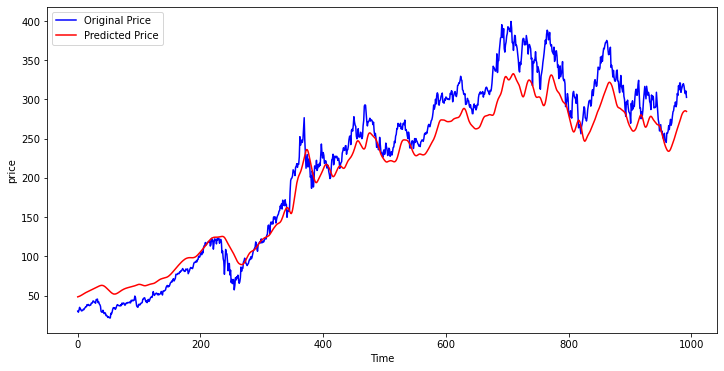

In [41]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()